<a href="https://colab.research.google.com/github/grvtaun/Python-/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('covid_data_kerala.csv')

Performing EDA

In [ ]:
df.shape

(541, 4)

In [ ]:
df.head

<bound method NDFrame.head of      Date  Confirmed  Recovered  Deceased
0     Jan          0        NaN         0
1       F          0        NaN         0
2       F          1        NaN         0
3       F          1        NaN         0
4       F          0        NaN         0
..    ...        ...        ...       ...
536  June      16848    12052.0       104
537  June      17481    14131.0       105
538  June      12818    13454.0       122
539  June      17518    11067.0       132
540  June      18531    15507.0        98

[541 rows x 4 columns]>

In [ ]:
df.tail

<bound method NDFrame.tail of      Date  Confirmed  Recovered  Deceased
0     Jan          0        NaN         0
1       F          0        NaN         0
2       F          1        NaN         0
3       F          1        NaN         0
4       F          0        NaN         0
..    ...        ...        ...       ...
536  June      16848    12052.0       104
537  June      17481    14131.0       105
538  June      12818    13454.0       122
539  June      17518    11067.0       132
540  June      18531    15507.0        98

[541 rows x 4 columns]>

In [ ]:
df.isna().sum()

Date          0
Confirmed     0
Recovered    56
Deceased      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       541 non-null    object 
 1   Confirmed  541 non-null    int64  
 2   Recovered  485 non-null    float64
 3   Deceased   541 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.0+ KB


In [ ]:
df.describe()

,Confirmed,Recovered,Deceased
count,541.000000,485.000000,541.000000
mean,6014.903882,6391.354639,29.517560
std,8492.585661,9357.309537,46.289289
min,0.000000,0.000000,0.000000
25%,94.000000,688.000000,0.000000
50%,3215.000000,4172.000000,15.000000
75%,6862.000000,7015.000000,26.000000
max,43529.000000,99651.000000,227.000000


In [ ]:
df.dropna()

,Date,Confirmed,Recovered,Deceased
56,Mar,39,3.0,0
57,Mar,6,8.0,1
58,Mar,20,4.0,0
59,Mar,32,0.0,0
60,Mar,7,4.0,1
...,...,...,...,...
536,June,16848,12052.0,104
537,June,17481,14131.0,105
538,June,12818,13454.0,122
539,June,17518,11067.0,132


In [ ]:

df.head()

,Date,Confirmed,Recovered,Deceased
0,Jan,0,NaN,0
1,F,0,NaN,0
2,F,1,NaN,0
3,F,1,NaN,0
4,F,0,NaN,0


In [ ]:
df.tail()

,Date,Confirmed,Recovered,Deceased
536,June,16848,12052.0,104
537,June,17481,14131.0,105
538,June,12818,13454.0,122
539,June,17518,11067.0,132
540,June,18531,15507.0,98


In [ ]:
df.head

<bound method NDFrame.head of      Date  Confirmed  Recovered  Deceased
0     Jan          0        NaN         0
1       F          0        NaN         0
2       F          1        NaN         0
3       F          1        NaN         0
4       F          0        NaN         0
..    ...        ...        ...       ...
536  June      16848    12052.0       104
537  June      17481    14131.0       105
538  June      12818    13454.0       122
539  June      17518    11067.0       132
540  June      18531    15507.0        98

[541 rows x 4 columns]>

In [ ]:
df.replace('Jan',1)
df.replace('F',2)
df.replace('Mar',3)
df.replace('Apr',4)
df.replace('May',5)
df.replace('June',6)
df.replace('July',7)
df.replace('Aug',8)
df.replace('Sep',9)
df.replace('Oct',10)
df.replace('N',11)
df.replace('D',12)


,Date,Confirmed,Recovered,Deceased
0,Jan,0,NaN,0
1,F,0,NaN,0
2,F,1,NaN,0
3,F,1,NaN,0
4,F,0,NaN,0
...,...,...,...,...
536,June,16848,12052.0,104
537,June,17481,14131.0,105
538,June,12818,13454.0,122
539,June,17518,11067.0,132


In [ ]:
X = df.loc[:,['Confirmed']].values
y = df.loc[:,['Date']].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)

In [ ]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

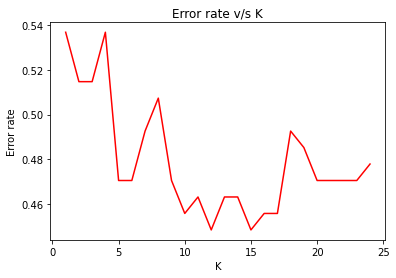

In [ ]:

plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:

confusion_matrix(y_test,y_pred)

array([[ 7,  0,  0,  1,  0,  2,  3,  2,  1,  1,  0],
       [ 0,  6,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 1,  0,  3,  1,  3,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  2,  9,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  5,  1,  3,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0, 25,  0,  0,  0,  3,  0],
       [ 1,  3,  0,  2,  0,  1,  3,  0,  0,  0,  0],
       [ 4,  0,  0,  1,  0,  1,  2, 10,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  2,  0,  0,  1,  3,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0,  0,  2,  0]])

In [ ]:

accuracy_score(y_test,y_pred)

0.5294117647058824